In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/capstone-data/New_data_Set.csv


# Capstone Project

## Problem Statement

Solving this problem will help you to gain a basic understanding of the HR industry and also how analytics and data science are applied in practice in this domain.

## A brief understanding of the HR industry

Human resources (HR) is the division of an organization that is responsible for finding, screening, recruiting, and training job applicants, and administering employee-benefit programs.

This management is the strategic approach to the efficient management of people in any organization in a way that can help their business gain a competitive advantage. It is designed to improve employee performance in service of an employer's strategic objectives.

Understanding the Problem Statement

## In this project, you will have to put yourself in the shoes of an HR analytics expert and by leveraging the data provided, you are supposed to identify how salary is varying with respect to other considerable factors.

The dataset should be divided into test and train and you would have to use the training data to build the model and thereby apply it to test data to measure the performance and robustness of the model.

In [3]:
#importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading datasets
df = pd.read_csv("/kaggle/input/capstone-data/New_data_Set.csv")
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


## Feature discription

Gender - Have 2 categorical values Male and Female

Business - 1 says have business and 0 says doesn't

Age - Age of the person

Salary - CTC of the employee which includes Base pay and all other pays

Dependants - This shows whether employee has any dependant or not

Months - duration of the person employed with the company

Calls - if the person has authority to make calls or not

Type - salary settlement type

Billing - Subscribed to billing plans or no

Unit sales - unit of sale made by the person

Total sales - total sales made by the person

Rating - If he has been given a rating by a superior or no

Bonus - amount received by a person as bonus for sales

Base pay - Base pay of the employee

Unit price - The Unit price of a sale

Volume - volume allotted to a person

Opening balance - The opening balance of an employee

Low - lowest balance allotted to a person.

Closing Balance- The closing balance of an employee

Education- Educational background of an employee

In [5]:
#Basic EDA steps, checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [6]:
#basic EDA step, description of data individualy
df.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


In [7]:
#Checking null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [8]:
#as we have found many null values in different columns, dropping null values from Total Sales columns as values are just 8 and that doesn't affect analysis
df.dropna(subset=['Total_Sales'], inplace=True)

In [9]:
#checking whether null values are dropped or not
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1474
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          0
Months               0
Education            0
dtype: int64

In [10]:
#now dropping null values from Base pay columns as, 23 values doesn't affect analysis
df.dropna(subset=['Base_pay'], inplace=True)

In [11]:
#parity check of null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay             0
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1474
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          0
Months               0
Education            0
dtype: int64

In [12]:
#As there are 1474 null values in opening balance column, we couldn't drop them as it affects the data analysis.
#Parity check
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,,72,PG


As we could see blank values in total sales columns, to remove blank values, we have to replace them with null value

In [13]:
#to replace blank values with any other values, we have to fill those values with null i.e NaN
df.replace(r'\s+', np.nan, regex=True)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.8,0,NaN
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,NaN
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.9,0,NaN
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.350000,66130600,4.26,4.310000,3.830000,18.75,19,0,NaN
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Female,0,No,Yes,Month-to-month,No,No,72,180696.80,72278.720,9034.8400,629.511067,3927000,NaN,293.838840,310.955001,117.80,NaN,72,PG
4996,Male,0,No,Yes,Month-to-month,Yes,No,73,185685.90,74274.360,9284.2950,627.841071,6031900,NaN,301.311314,309.610028,118.60,NaN,72,PG
4997,Male,0,No,Yes,Month-to-month,Yes,No,74,192636.80,77054.720,9631.8400,625.860033,7949400,NaN,306.040009,303.483494,118.60,NaN,72,PG
4998,Male,1,No,Yes,Month-to-month,Yes,Yes,74,195970.70,78388.280,9798.5350,629.510005,3908400,NaN,308.579987,312.432438,118.65,NaN,72,PG


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4969 non-null   object 
 1   Business        4969 non-null   int64  
 2   Dependancies    4969 non-null   object 
 3   Calls           4969 non-null   object 
 4   Type            4969 non-null   object 
 5   Billing         4969 non-null   object 
 6   Rating          4969 non-null   object 
 7   Age             4969 non-null   int64  
 8   Salary          4969 non-null   float64
 9   Base_pay        4969 non-null   float64
 10  Bonus           4969 non-null   float64
 11  Unit_Price      4969 non-null   float64
 12  Volume          4969 non-null   int64  
 13  openingbalance  3495 non-null   float64
 14  closingbalance  4969 non-null   float64
 15  low             4969 non-null   float64
 16  Unit_Sales      4969 non-null   float64
 17  Total_Sales     4969 non-null   o

As we could see, there are no null values are counted because of data type even though we had replcaed with NaN
So we have to change the datatype string into integer

In [15]:
#dataype conversion
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'],errors = 'coerce')

In [16]:
#checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4969 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4969 non-null   object 
 1   Business        4969 non-null   int64  
 2   Dependancies    4969 non-null   object 
 3   Calls           4969 non-null   object 
 4   Type            4969 non-null   object 
 5   Billing         4969 non-null   object 
 6   Rating          4969 non-null   object 
 7   Age             4969 non-null   int64  
 8   Salary          4969 non-null   float64
 9   Base_pay        4969 non-null   float64
 10  Bonus           4969 non-null   float64
 11  Unit_Price      4969 non-null   float64
 12  Volume          4969 non-null   int64  
 13  openingbalance  3495 non-null   float64
 14  closingbalance  4969 non-null   float64
 15  low             4969 non-null   float64
 16  Unit_Sales      4969 non-null   float64
 17  Total_Sales     4961 non-null   f

In [17]:
#checking for number of null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay             0
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1474
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [18]:
#dropping null values by single coloumn - dropping of blank values we had found and replaced with null values
df.dropna(subset=['Total_Sales'], inplace=True)

In [19]:
#parity check for null values
df.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay             0
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1466
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          0
Months               0
Education            0
dtype: int64

In [20]:
# business column is categorical value so we need to change business into string
df.Business = df.Business.astype('object')

In [21]:
#dataframe
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.0000,2035.60000,254.450000,3.770000,21226600,3.75,3.760000,3.650000,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.1200,2279.24800,284.906000,3.740000,10462800,3.85,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.6500,2358.66000,294.832500,3.890000,18761000,4.23,4.290000,3.720000,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.1200,2450.04800,306.256000,4.350000,66130600,4.26,4.310000,3.830000,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.0000,2498.00000,312.250000,4.340000,26868200,4.79,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,Male,0,No,Yes,Month-to-month,No,Yes,70,165120.6282,66048.25127,8256.031410,309.089996,337100,NaN,177.669998,305.799988,116.60,8496.70,72,PG
4988,Female,0,No,Yes,Two year,No,No,70,165132.4859,66052.99437,8256.624295,309.920013,410100,NaN,171.559998,304.000000,116.75,8529.50,72,PG
4989,Female,0,Yes,Yes,Month-to-month,No,No,70,167621.0992,72278.72000,8381.054960,310.000000,547600,NaN,174.259995,305.290009,116.80,8564.75,72,PG
4990,Male,0,No,Yes,Month-to-month,No,No,70,168974.5280,61235.51239,8448.726400,312.500000,317200,NaN,223.960007,307.399994,116.85,8672.45,72,PG


As there are 1466 null values in the opinening balance column, we coudn't drop them as it can affect the analysis. 
So when I gone thorugh each columns of data, I found that opening balance and closing balance are literally equal.
So I decided to replace null values of opening balance with closing balance values, which doesn't affect the analysis.


In [22]:
#replacing null values of opening balance with values of closing values.
df["openingbalance"].fillna(df["closingbalance"], inplace=True)
df

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.0000,2035.60000,254.450000,3.770000,21226600,3.750000,3.760000,3.650000,18.25,18.80,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.1200,2279.24800,284.906000,3.740000,10462800,3.850000,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.6500,2358.66000,294.832500,3.890000,18761000,4.230000,4.290000,3.720000,18.70,18.90,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.1200,2450.04800,306.256000,4.350000,66130600,4.260000,4.310000,3.830000,18.75,19.00,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.0000,2498.00000,312.250000,4.340000,26868200,4.790000,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,Male,0,No,Yes,Month-to-month,No,Yes,70,165120.6282,66048.25127,8256.031410,309.089996,337100,177.669998,177.669998,305.799988,116.60,8496.70,72,PG
4988,Female,0,No,Yes,Two year,No,No,70,165132.4859,66052.99437,8256.624295,309.920013,410100,171.559998,171.559998,304.000000,116.75,8529.50,72,PG
4989,Female,0,Yes,Yes,Month-to-month,No,No,70,167621.0992,72278.72000,8381.054960,310.000000,547600,174.259995,174.259995,305.290009,116.80,8564.75,72,PG
4990,Male,0,No,Yes,Month-to-month,No,No,70,168974.5280,61235.51239,8448.726400,312.500000,317200,223.960007,223.960007,307.399994,116.85,8672.45,72,PG


In [23]:
#description of catogorical features
df.describe( include= ['object'])

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Education
count,4961,4961,4961,4961,4961,4961,4961,4961
unique,2,2,2,2,3,2,2,4
top,Male,0,No,Yes,Month-to-month,Yes,No,PG
freq,2504,4166,3500,4502,2755,2934,3651,2944


Here we get to know that how many categorical vlaues we have in the dataset for each column.

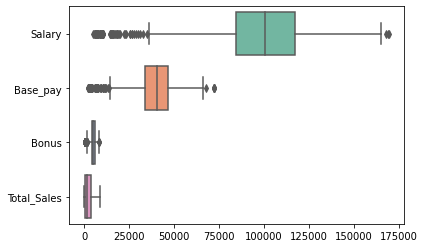

In [24]:
#checking for outliers
df_1 = df[['Salary','Base_pay','Bonus','Total_Sales']]
df_2 = df[['Unit_Price','openingbalance','closingbalance','low','Unit_Sales',]]
ax = sns.boxplot(data=df_1, orient="h", palette="Set2")

In the above graph, we could that there are outliers for Salary and Bonus but I do not like to replace outliers for Salary or Bonus columns as we need to work that part

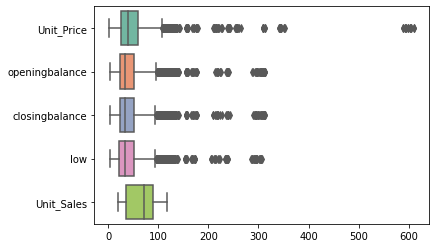

In [25]:
ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

In the above graph we can see many outliers but right now I am not going to make any changes as these values might get us insigts


In [26]:
#saving cleaned dataset for future process like data sets for tableau or sql
df.to_csv('cleaned.csv') 

# Checking each categorical column individualy with salary column

This process involves comparing each categorical value of the column so that we get to know which factors are affecting salary component

## Gender

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

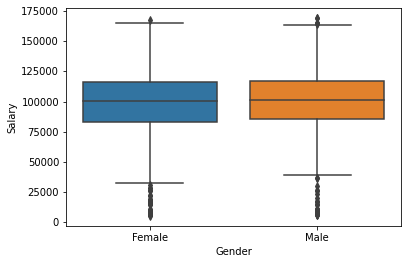

In [28]:
#creating a box plot to see the mean between two categorical variables
sns.boxplot( x = 'Gender',y = 'Salary', data =df)

Both genders have equal average salary so particular gender doesn't affect salary

## Business

<AxesSubplot:xlabel='Business', ylabel='Salary'>

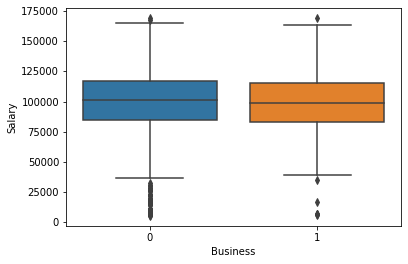

In [30]:
sns.boxplot( x = 'Business',y = 'Salary', data =df)

By seeing this plot we can say that employees who doesn't business are having more salary than who have business

## Dependaries

<AxesSubplot:xlabel='Dependancies', ylabel='Salary'>

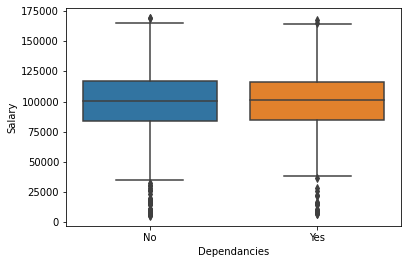

In [31]:
sns.boxplot( x = 'Dependancies',y = 'Salary', data =df)

Nothing much to concentrate on this feature. As this doesn't give us any notebale information regarding salary

## Calls

<AxesSubplot:xlabel='Calls', ylabel='Salary'>

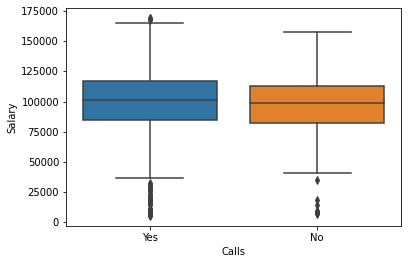

In [32]:
sns.boxplot( x = 'Calls',y = 'Salary', data =df)

As we could find nothing noticable from the plot

## Type

<AxesSubplot:xlabel='Type', ylabel='Salary'>

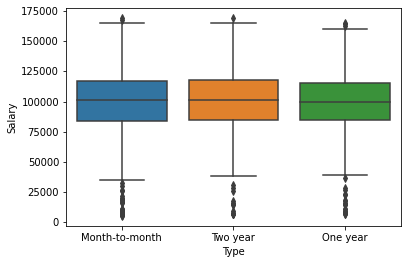

In [33]:
sns.boxplot( x = 'Type',y = 'Salary', data =df)

All the 3 plots have approx equal mean so we cannot come to conclusion that Type doesn't affect salary

## Billing

<AxesSubplot:xlabel='Billing', ylabel='Salary'>

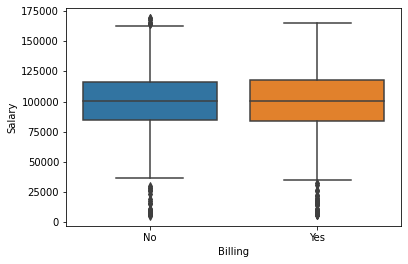

In [34]:
sns.boxplot( x = 'Billing',y = 'Salary', data =df)

No impact of the billing on salary

## Rating

<AxesSubplot:xlabel='Rating', ylabel='Salary'>

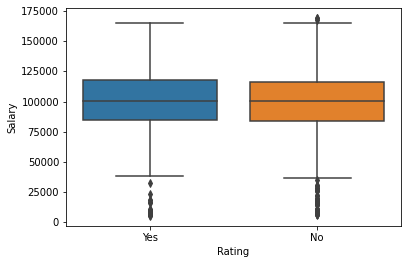

In [35]:
sns.boxplot( x = 'Rating',y = 'Salary', data =df)

We dont find any impact

## Age 

In [37]:
#grouping age wise salary
age_sum_wise = df.groupby(('Age')).agg({'Salary': 'mean'})

age_sum_wise = age_sum_wise.reset_index()
age_sum_wise.sort_values(by='Age')


,Age,Salary
0,18,43731.126425
1,19,71153.082087
2,20,96012.721235
3,21,87108.075283
4,22,89907.458533
...,...,...
60,79,125349.806100
61,80,103920.781300
62,82,103981.468600
63,85,103984.536300


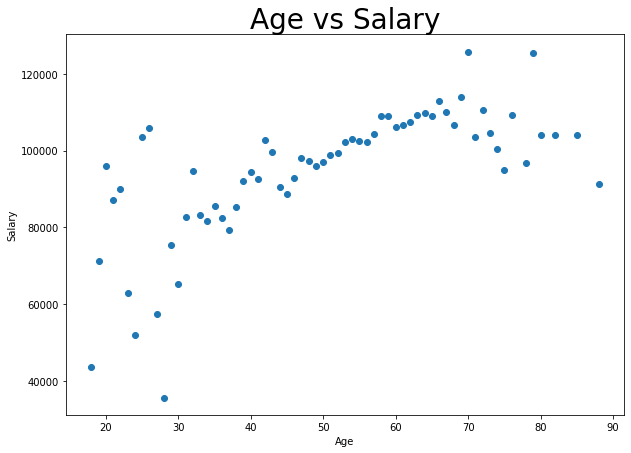

In [38]:
#ploting line graph
bins = age_sum_wise['Salary']

fig, ax = plt.subplots(figsize =(10, 7))
ax.scatter(age_sum_wise['Age'], bins)
plt.title('Age vs Salary', fontsize=28)
plt.xlabel('Age')
plt.ylabel('Salary')
# Show plot
plt.show()

Here we could come to conculsion that employees are having more salary upon their ages, may be experience

## Months of Experience

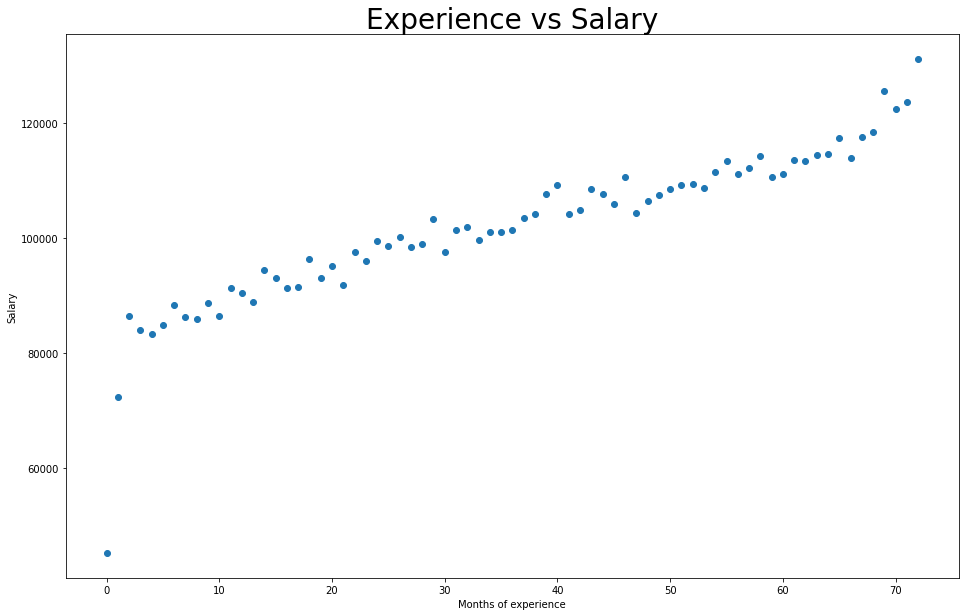

In [39]:
#grouping age wise salary
month_sum_wise = df.groupby(('Months')).agg({'Salary': 'mean'})

month_sum_wise = month_sum_wise.reset_index()
month_sum_wise.sort_values(by='Months')

#ploting line graph
line = month_sum_wise['Salary']

fig, ax = plt.subplots(figsize =(16, 10))
ax.scatter(month_sum_wise['Months'], line)
plt.title('Experience vs Salary', fontsize=28)
plt.xlabel('Months of experience')
plt.ylabel('Salary')
# Show plot
plt.show()

This graph shows salary depends on experience they hold, and tenure

## Education

<AxesSubplot:xlabel='Education', ylabel='Salary'>

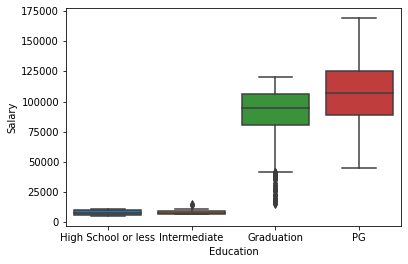

In [40]:
    sns.boxplot( x = 'Education',y = 'Salary', data =df)

Here we get to know that Education impact on salary

# Finally we get to know that salary depend on Tenure, Education and sometimes on Age too. 

## Check the number of variables that are normally distributed & explain

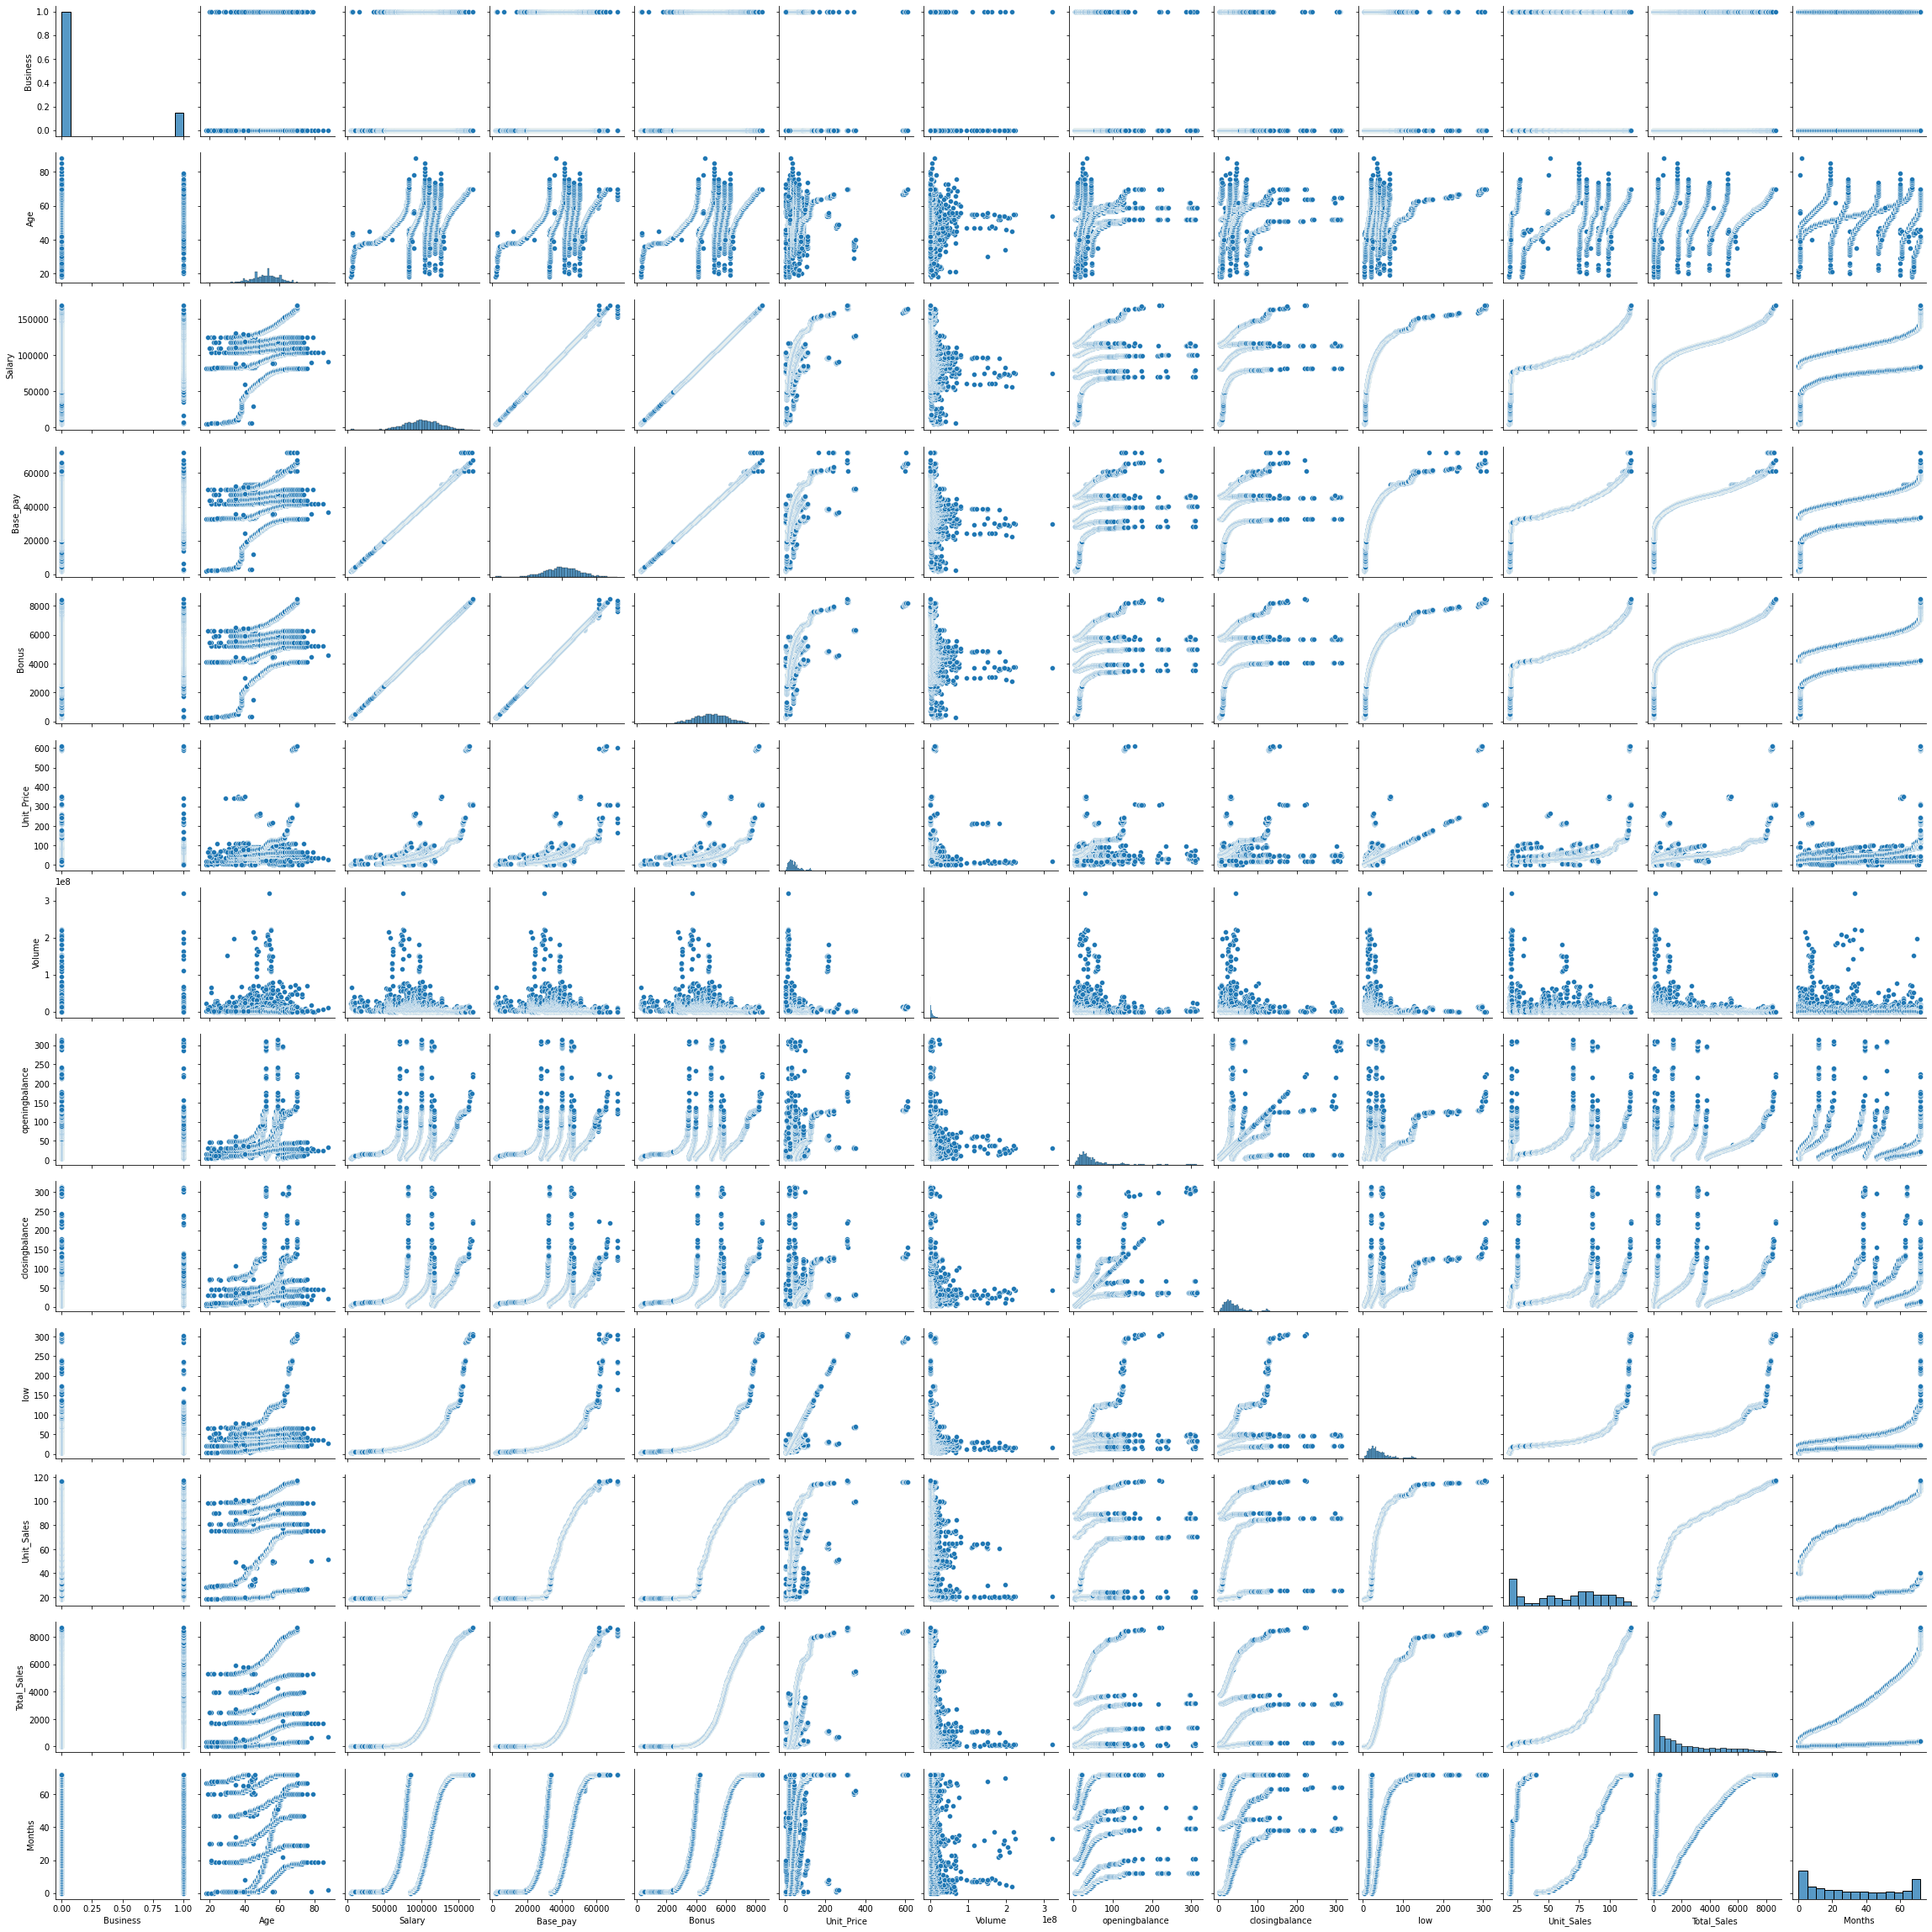

In [42]:
# we can use pairplot to create correlation graph rather than ploting scatter plot for each columns
sns.pairplot(df)

## Spearman correlation

In [43]:
#correlation between the columns 
heatmap = df.corr(method='spearman').round(2)
#print(heatmap)

<AxesSubplot:>

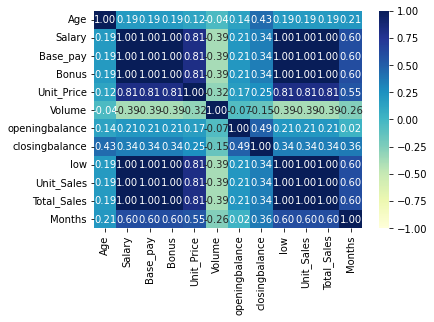

In [44]:
#plotting heatmap for the variables
sns.heatmap(heatmap,cmap="YlGnBu",fmt='.2f', annot=True,vmin=-1, vmax=1)

> #### Spearman rank has correlation between -1 to +1. 

Here,

+1: Perfectly increasing relationship

+0.8: Strong increasing relationship

+0.2: Weak increasing relationship

0: Non relation

-0.2: Weak decreasing relationship

-0.8: Strong decreasing relationship

-1: Perfectly decreasing relationship

From this correlation model we can select few columns for machine learing model, those columns should not to have correlation value between -0.60 to +0.60 with Salary column.  

#### Machine learning model
Low, Unit_Sales ,Total_Sales, Months, Base_Pay, Bonus, Unit_Price are highly correlated with salary column


#### Model Creation

 Gender, Business, Dependencies, Type, Billing, Rating, Education have significant p-value, so we will consider it for model creation 

### Splitting the dependent variable

In [45]:
y=df['Salary']
y

0         5089.0000
1         5698.1200
2         5896.6500
3         6125.1200
4         6245.0000
           ...     
4987    165120.6282
4988    165132.4859
4989    167621.0992
4990    168974.5280
4991    169149.7070
Name: Salary, Length: 4961, dtype: float64

### Splitting the independent variables

In [46]:
X=df[['low', 'Unit_Sales' ,'Total_Sales', 'Months', 'Base_pay', 'Bonus', 'Unit_Price','Gender', 'Business', 
     'Dependancies', 'Type', 'Billing', 'Rating','Education']]
X

,low,Unit_Sales,Total_Sales,Months,Base_pay,Bonus,Unit_Price,Gender,Business,Dependancies,Type,Billing,Rating,Education
0,3.650000,18.25,18.80,0,2035.60000,254.450000,3.770000,Female,0,No,Month-to-month,No,Yes,High School or less
1,3.650000,18.40,18.85,0,2279.24800,284.906000,3.740000,Female,0,No,Month-to-month,No,Yes,High School or less
2,3.720000,18.70,18.90,0,2358.66000,294.832500,3.890000,Male,0,No,Month-to-month,Yes,No,High School or less
3,3.830000,18.75,19.00,0,2450.04800,306.256000,4.350000,Female,1,No,Month-to-month,Yes,Yes,High School or less
4,4.080000,18.80,19.05,1,2498.00000,312.250000,4.340000,Male,0,No,Month-to-month,Yes,Yes,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,305.799988,116.60,8496.70,72,66048.25127,8256.031410,309.089996,Male,0,No,Month-to-month,No,Yes,PG
4988,304.000000,116.75,8529.50,72,66052.99437,8256.624295,309.920013,Female,0,No,Two year,No,No,PG
4989,305.290009,116.80,8564.75,72,72278.72000,8381.054960,310.000000,Female,0,Yes,Month-to-month,No,No,PG
4990,307.399994,116.85,8672.45,72,61235.51239,8448.726400,312.500000,Male,0,No,Month-to-month,No,No,PG


## Creating dummy values of numerical values

In [47]:
Xg=pd.get_dummies(X['Gender'], prefix='Gender',columns=['M'],drop_first=True)
X=X.join(Xg)

In [48]:
Xb=pd.get_dummies(X['Business'], prefix='Business',columns=['1'],drop_first=True)
X=X.join(Xb)

In [49]:
Xd=pd.get_dummies(X['Dependancies'], prefix='Dependancies',columns=['Yes'],drop_first=True)
X=X.join(Xd)

In [50]:
Xt=pd.get_dummies(X['Type'], prefix='Type',columns=['Two_year','One_year'],drop_first=True)
X=X.join(Xt)

In [51]:
Xb1=pd.get_dummies(X['Billing'], prefix='Billing',columns=['Yes'],drop_first=True)
X=X.join(Xb1)

In [52]:
Xr=pd.get_dummies(X['Rating'], prefix='Rating',columns=['No'],drop_first=True)
X=X.join(Xr)

In [53]:
Xt=pd.get_dummies(X['Education'], prefix='Edu',columns=['Intermediate', 'Graduation', 'PG'],drop_first=True)
X=X.join(Xt)

### Now we will drop unnessaccery column

In [54]:
X.drop(['Gender', 'Business', 'Dependancies', 'Type', 'Billing', 'Rating','Education'], axis = 1, inplace=True)

In [55]:
X

,low,Unit_Sales,Total_Sales,Months,Base_pay,Bonus,Unit_Price,Gender_Male,Business_1,Dependancies_Yes,Type_One year,Type_Two year,Billing_Yes,Rating_Yes,Edu_High School or less,Edu_Intermediate,Edu_PG
0,3.650000,18.25,18.80,0,2035.60000,254.450000,3.770000,0,0,0,0,0,0,1,1,0,0
1,3.650000,18.40,18.85,0,2279.24800,284.906000,3.740000,0,0,0,0,0,0,1,1,0,0
2,3.720000,18.70,18.90,0,2358.66000,294.832500,3.890000,1,0,0,0,0,1,0,1,0,0
3,3.830000,18.75,19.00,0,2450.04800,306.256000,4.350000,0,1,0,0,0,1,1,1,0,0
4,4.080000,18.80,19.05,1,2498.00000,312.250000,4.340000,1,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,305.799988,116.60,8496.70,72,66048.25127,8256.031410,309.089996,1,0,0,0,0,0,1,0,0,1
4988,304.000000,116.75,8529.50,72,66052.99437,8256.624295,309.920013,0,0,0,0,1,0,0,0,0,1
4989,305.290009,116.80,8564.75,72,72278.72000,8381.054960,310.000000,0,0,1,0,0,0,0,0,0,1
4990,307.399994,116.85,8672.45,72,61235.51239,8448.726400,312.500000,1,0,0,0,0,0,0,0,0,1


In [56]:
#renaming column names as those contain space.

X.rename(columns={'Edu_High School or less':'Edu_High_School_less','Type_One year':'Type_One_Year',
                   'Type_Two year':'Type_Two_Year'},inplace=True)

In [57]:
X

,low,Unit_Sales,Total_Sales,Months,Base_pay,Bonus,Unit_Price,Gender_Male,Business_1,Dependancies_Yes,Type_One_Year,Type_Two_Year,Billing_Yes,Rating_Yes,Edu_High_School_less,Edu_Intermediate,Edu_PG
0,3.650000,18.25,18.80,0,2035.60000,254.450000,3.770000,0,0,0,0,0,0,1,1,0,0
1,3.650000,18.40,18.85,0,2279.24800,284.906000,3.740000,0,0,0,0,0,0,1,1,0,0
2,3.720000,18.70,18.90,0,2358.66000,294.832500,3.890000,1,0,0,0,0,1,0,1,0,0
3,3.830000,18.75,19.00,0,2450.04800,306.256000,4.350000,0,1,0,0,0,1,1,1,0,0
4,4.080000,18.80,19.05,1,2498.00000,312.250000,4.340000,1,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,305.799988,116.60,8496.70,72,66048.25127,8256.031410,309.089996,1,0,0,0,0,0,1,0,0,1
4988,304.000000,116.75,8529.50,72,66052.99437,8256.624295,309.920013,0,0,0,0,1,0,0,0,0,1
4989,305.290009,116.80,8564.75,72,72278.72000,8381.054960,310.000000,0,0,1,0,0,0,0,0,0,1
4990,307.399994,116.85,8672.45,72,61235.51239,8448.726400,312.500000,1,0,0,0,0,0,0,0,0,1


### Splitting the Dataset into test and train

In [58]:
#importing the test_train_split to split the data by taking rendom sample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=1)

# created this for normalization
X_train_normal=X_train.copy()
X_test_normal=X_test.copy()

#created this for standardization
X_train_std=X_train.copy()
X_test_std=X_test.copy()

###  Linear Regression 

As the data is continous I prefer Linear Regression method to build a prediction model

In [60]:
#Selecting Linear Regression
l_model = LinearRegression()
l_model.fit(X_train,y_train)


# from normalized
l_modeln = LinearRegression()
l_modeln.fit(X_train_normal,y_train)

# for standardized
l_models = LinearRegression()
l_models.fit(X_train_std,y_train)

LinearRegression()

In [61]:
#Getting the perdiction from the train data using linear model
y_pred=l_model.predict(X_train)

In [62]:
#Getting the RMSE

rmse = mean_squared_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)
print('---------------- For the Train Dataset--------------')
print('RMSE:{}'.format(rmse))
print('R2:{}'.format(r2))

---------------- For the Train Dataset--------------
RMSE:1.2833802570855742e-11
R2:1.0


In [63]:
#Getting the perdiction from the test data using linear model

y_test_pred=l_model.predict(X_test)

In [64]:
rmse = mean_squared_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)
print('---------------- For the Test Dataset--------------')
print('RMSE:{}'.format(rmse))
print('R2:{}'.format(r2))

---------------- For the Test Dataset--------------
RMSE:1.3712158967470288e-11
R2:1.0


### Result

1. RMSE score of both train and test data are almost equal but test data score is slightly more than train data score

2. R2 score of test and train data is 1.

In [65]:
y.shape

(4961,)

In [66]:
y_pred.shape

(3968,)

# To try with other techniques I chose Decision tree and Random Tree

## Decision Tree 

In [67]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

### Method to calculate the decision tree using regression

In [68]:
def calculateDecisionTree(depth,X_train,y_train,X_test,y_test):
    print('------------------Depth Level {}--------------------'.format(depth))
    # create a regressor object
    DTRegressor = DecisionTreeRegressor(max_depth=depth, random_state = 0) 
    DTRegressor.fit(X_train,y_train)
    print('Training value: {}'.format(DTRegressor.score(X_train,y_train)))
    print('Test value: {}'.format(DTRegressor.score(X_test,y_test)))
    print('----------------------------------------------------')
    

### Data without scaling

In [69]:
for i in range(1, 10):
    calculateDecisionTree(i, X_train,y_train,X_test,y_test)
    

------------------Depth Level 1--------------------
Training value: 0.6071568588819293
Test value: 0.6113217330689131
----------------------------------------------------
------------------Depth Level 2--------------------
Training value: 0.8607731323202071
Test value: 0.8607881468459009
----------------------------------------------------
------------------Depth Level 3--------------------
Training value: 0.9643536128159341
Test value: 0.9674716472359342
----------------------------------------------------
------------------Depth Level 4--------------------
Training value: 0.9902072437234783
Test value: 0.9908629725299768
----------------------------------------------------
------------------Depth Level 5--------------------
Training value: 0.997781365956205
Test value: 0.9977401820858248
----------------------------------------------------
------------------Depth Level 6--------------------
Training value: 0.9994423070495512
Test value: 0.9993954056424041
----------------------------

### Data with Normalization

In [70]:
for i in range(1, 10):
    calculateDecisionTree(i, X_train_normal,y_train,X_test_normal,y_test)
    

------------------Depth Level 1--------------------
Training value: 0.6071568588819293
Test value: 0.6113217330689131
----------------------------------------------------
------------------Depth Level 2--------------------
Training value: 0.8607731323202071
Test value: 0.8607881468459009
----------------------------------------------------
------------------Depth Level 3--------------------
Training value: 0.9643536128159341
Test value: 0.9674716472359342
----------------------------------------------------
------------------Depth Level 4--------------------
Training value: 0.9902072437234783
Test value: 0.9908629725299768
----------------------------------------------------
------------------Depth Level 5--------------------
Training value: 0.997781365956205
Test value: 0.9977401820858248
----------------------------------------------------
------------------Depth Level 6--------------------
Training value: 0.9994423070495512
Test value: 0.9993954056424041
----------------------------

### Data with Standardization

In [72]:
for i in range(1, 10):
    calculateDecisionTree(i, X_train_std,y_train,X_test_std,y_test)
    

------------------Depth Level 1--------------------
Training value: 0.6071568588819293
Test value: 0.6113217330689131
----------------------------------------------------
------------------Depth Level 2--------------------
Training value: 0.8607731323202071
Test value: 0.8607881468459009
----------------------------------------------------
------------------Depth Level 3--------------------
Training value: 0.9643536128159341
Test value: 0.9674716472359342
----------------------------------------------------
------------------Depth Level 4--------------------
Training value: 0.9902072437234783
Test value: 0.9908629725299768
----------------------------------------------------
------------------Depth Level 5--------------------
Training value: 0.997781365956205
Test value: 0.9977401820858248
----------------------------------------------------
------------------Depth Level 6--------------------
Training value: 0.9994423070495512
Test value: 0.9993954056424041
----------------------------

## Conclusion

1. As we can see that 3,4 and 5 had yield good results compared to others

## Random Forest 

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
# define the model
for i in range(3,20):
    RF = RandomForestRegressor(n_estimators=i)
    RF.fit(X_train,y_train)
    train_score=RF.score(X_train,y_train)
    test_score= RF.score(X_test,y_test)
    if test_score > train_score :
        print('-------------Estimator: {}------------'.format(i))
        print('RF score for train:{}'.format(train_score))
        print('RF score for test:{}'.format(test_score))
        print('--------------------------------------')

In [75]:
# define the model for normalized data
for i in range(3,20):
    RF = RandomForestRegressor(n_estimators=i)
    RF.fit(X_train_normal,y_train)
    train_score=RF.score(X_train_normal,y_train)
    test_score= RF.score(X_test_normal,y_test)
    if test_score > train_score :
        print('-------------Estimator: {}------------'.format(i))
        print('RF score for train:{}'.format(train_score))
        print('RF score for test:{}'.format(test_score))
        print('--------------------------------------')

In [76]:
# define the model form standardized data
for i in range(3,20):
    RF = RandomForestRegressor(n_estimators=i)
    RF.fit(X_train_std,y_train)
    train_score=RF.score(X_train_std,y_train)
    test_score= RF.score(X_test_std,y_test)
    if test_score > train_score :
        print('-------------Estimator: {}------------'.format(i))
        print('RF score for train:{}'.format(train_score))
        print('RF score for test:{}'.format(test_score))
        print('--------------------------------------')

# Couldn't find the result through Random Tree